<a href="https://colab.research.google.com/github/sushily1997/Project_1/blob/main/Capstone_Project_1_Propensity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Description**

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.


##**I. UNDERSTANDING THE DATA:**
**1. Data Overview**

**2. Clean the data**

In [267]:

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno




**1. Data Overview**

In [224]:
%%time
#load the dataset
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx', sheet_name='Online Retail')

CPU times: user 1min 16s, sys: 365 ms, total: 1min 16s
Wall time: 1min 16s


In [225]:
#shape of our dataset
print("The shape of our dataset is: ",df.shape)

The shape of our dataset is:  (541909, 8)


In [226]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


###**Attribute Information:**

This dataframe contains 8 variables that correspond to:

######**InvoiceNo** Invoice number. **Nominal**, a six digit integral number uniquely assigned to each transaction. **If this code starts with letter 'c', it indicates a cancellation**

######**tockCode** Product (item) code. **Nominal**, a five digit integral number uniquely assigned to each distinct product

######**Description** Product (item) name. **Nominal**

######**Quantity** The quantities of each product (item) per transaction. **Numeric**

######**InvoiceDate** Invoice Date and time.**Numeric**, the day and time when each transaction was generated

######**UnitPrice** Unit price. **Numeric**, product price per unit in sterling

######**CustomerID** Customer number. **Nominal**, a six digit integral number uniquely assigned to each customer

######**Country** Country name. **Nominal**, the name of the country where each customer resides


In [227]:
#check the head of the dataset
print(f'The shape of the data is {df.shape}')
df.head(10)


The shape of the data is (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [228]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [229]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo, StockCode, Description, InvoiceDate and Country are Non-numeric Variables

Quantity, UnitPrice and CustomerID are numeric Variables

Our dataset is composed of **541909** rows and **8** columns. When going through the columns, we notice that we have some missing values in the **CustomerID** column, as it only has **406829** values. Also the column **Description** has missing values. So, that should be considered when applying exploration to our dataset.

--> Let's see what non-numeric variables and numeric variables differ in the description



In [230]:
#describe the non-numeric features
df.describe(exclude=['float64','int64']).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaT,NaT
StockCode,541909,4070,85123A,2313,NaT,NaT
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaT,NaT
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00
Country,541909,38,United Kingdom,495478,NaT,NaT


Through the description, there are some highlight we can discuss about:

There are some missing data at 'Description" feature
Unitied Kingdom domains the distribution of country feature( 495478 out of 541909)

In [231]:
#describe the  numeric fearture
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Highligh:

There are some missing values at CustomerID
Quantity and UnitPrice suppose to be the positive value, howerver they receive the negative value as min value. Those negative values should be remove

**2. Data Cleaning: Checking for Null Values**

total number of obseration is: 541909


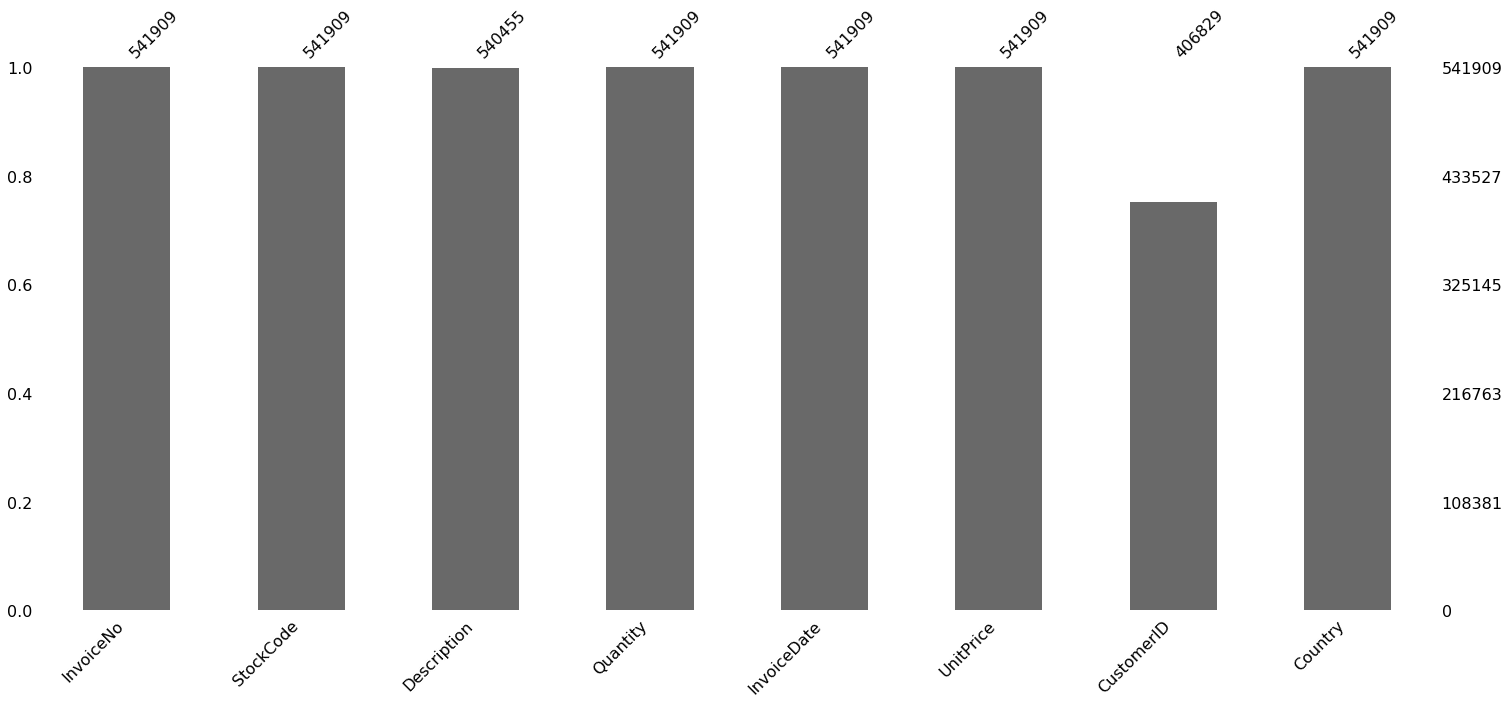

In [232]:
print ('total number of obseration is:',df.shape[0])
msno.bar(df)

We observed that CustomerID and Descriptive having missing data. We also can check the number of missing data using the below code:

In [233]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

I will delete all the missing data and then visualize the bar plot again

In [234]:
df.dropna(inplace =True)

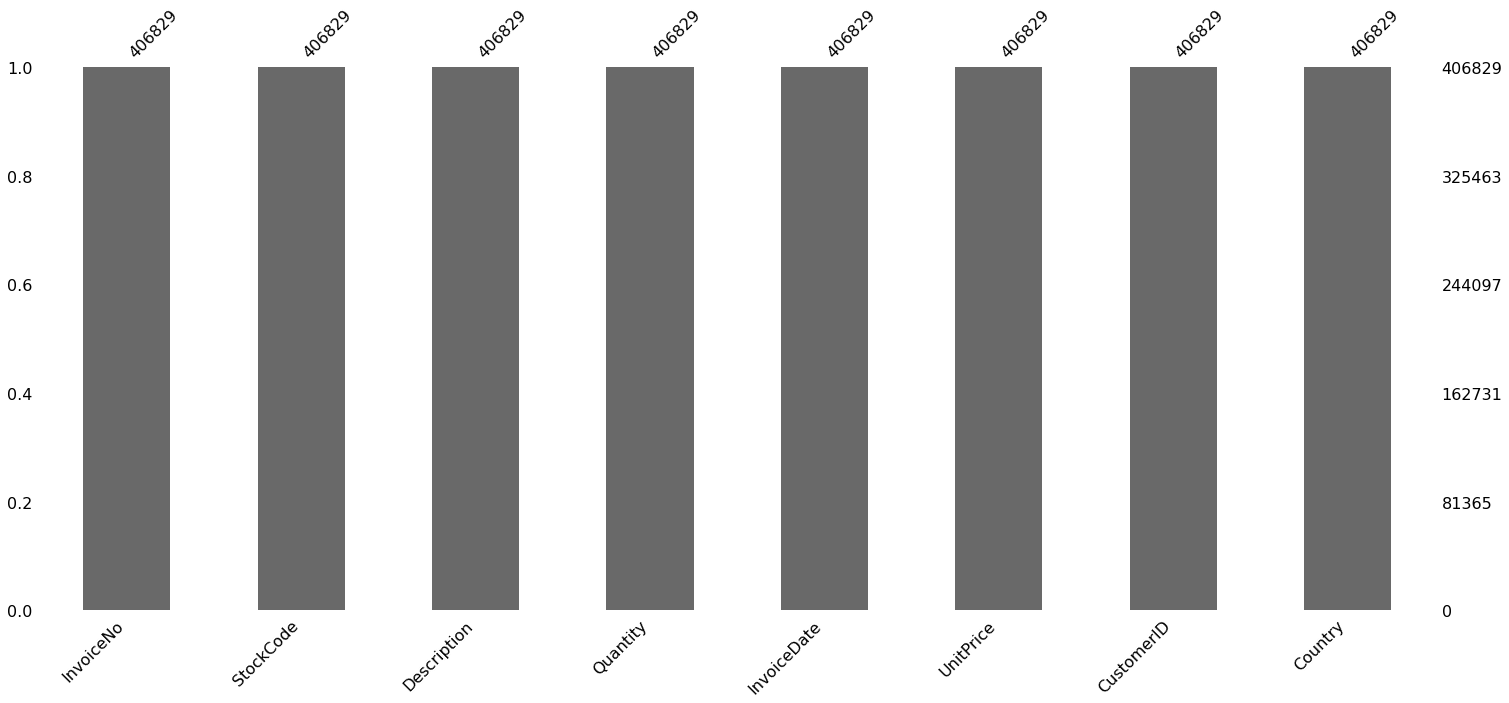

In [235]:
msno.bar(df)

In [236]:
df.dropna(inplace=True)
df.shape

(406829, 8)

In [241]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64')
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


In [244]:
now = dt.date(2011,12,9)
print(f'Date of Reference: {now}')
df['Date'] = df['InvoiceDate'].apply(lambda x: x.date())

Date of Reference: 2011-12-09


In [245]:
df1=df['TotalCost'] = df['Quantity'] * df['UnitPrice']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,54.08


In [262]:
country_price=df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
country_price

Country
United Kingdom          4008533
Netherlands              200128
EIRE                     136329
Germany                  117448
France                   109848
Australia                 83653
Sweden                    35637
Switzerland               29778
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16044
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Israel                     3990
Poland                     3653
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Czech Republic              592


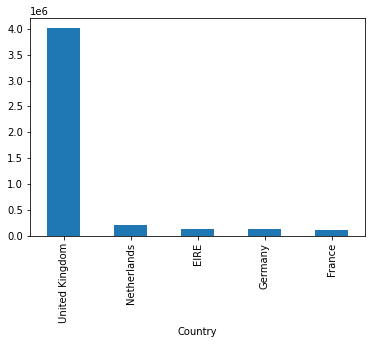

In [264]:
#Top 5 companies with high number of purchase
country_price[:5].plot(kind='bar')

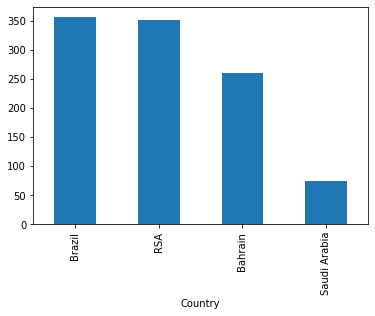

In [265]:
# 5 companies with least number of purchase
country_price[33:].plot(kind='bar')

In [276]:
#Adding year feature to the dataset
timest = df['InvoiceDate'].dt.year
df['Year'] = timest
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost,year,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010,2010


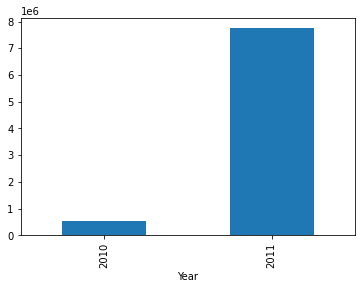

In [280]:
#Total sales for different years
df.groupby('Year')['TotalCost'].sum().plot(kind = 'bar')

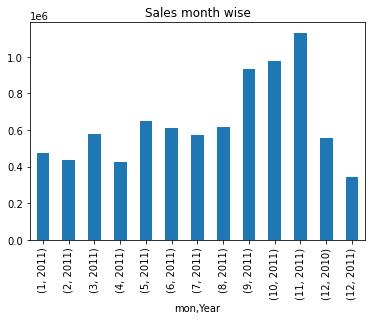

In [288]:
#Sales for different month
df['mon']=df['InvoiceDate'].dt.month
df['month']=df['InvoiceDate'].dt.month_name()
df.groupby(['mon','Year'])['TotalCost'].sum().plot(kind = 'bar', title = 'Sales month wise')

**Performance Analysis**

Sales Performance can be seen with

1.Number of sales every month

2.Number of sales every yeaar

3.We see that in 2010 we have sales only for dec and in 2011 we have sales for all moths

4.We can see that from September to Novembor we have very good sales

In [187]:
recency_df = df.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [188]:
oldcust_df = df.groupby(by='CustomerID', as_index=False)['Date'].min()
oldcust_df.columns = ['CustomerID','FirstPurshaceDate']
oldcust_df['OldCust'] = oldcust_df['FirstPurshaceDate'].apply(lambda x: (now - x).days)
oldcust_df.drop('FirstPurshaceDate',axis=1,inplace=True)

oldcust_df.head()

,CustomerID,OldCust
0,12346.0,325
1,12347.0,367
2,12348.0,358
3,12349.0,18
4,12350.0,310


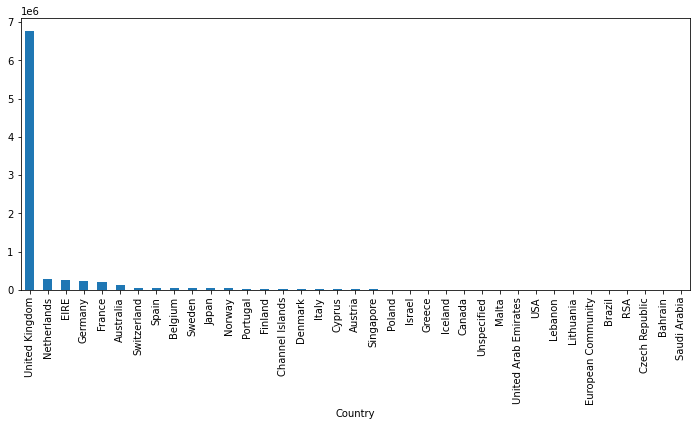

In [189]:
plt.figure(figsize=(12,5))
df.groupby("Country")["TotalCost"].sum().sort_values(ascending=False).plot(kind="bar")

In [190]:
#exploring the unique values of each attribute
print("Number of transactions: ",df['InvoiceNo'].nunique())
print("Number of products: ",df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',df['Country'].nunique())

Number of transactions:  22190
Number of products:  3684
Number of customers: 4372
Percentage of customers NA:  0.0 %
Number of countries:  37


**Note:** The number of NA customers is quite large and that would impact the results.

In [191]:
df.isna().sum(axis=0).sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
TotalCost      0
dtype: int64

In [192]:
#Checking the stats of all the columns
df.describe()

,Quantity,UnitPrice,CustomerID,TotalCost
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


The first thing to notice is that we have some negative values in our dataset. Maybe, this could mean that these quantities (with corresponding UnitPrice values) was returned or cancelled.


##**Verify Assumption: Cancelled invoices**

As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our assumption is correct about the negative quantity: -80995.

We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [193]:
#get cancelled transactions
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12-01,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,-6.96


In [194]:
#search for transaction where quantity == -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011-12-09,-168469.6


In [195]:
cancelled_orders[cancelled_orders['Quantity']>0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost


As we expected, negative values in the Quantity column, mean that it's a cancelled quantity because we didn't find any positive value for orders where InvoiceNo contains the prefix C.

**How much cancelled orders do we have**

In [196]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
total_orders =df['InvoiceNo'].nunique()

We have  8905  cancelled orders.


In [197]:
#percentage of cancelled orders in total orders
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

Percentage of orders canceled: 8905/22190 (40.13%) 


In [198]:
df.shape

(406829, 10)

We have a large percentage of cancelled orders of 35%. Studying these cancelled orders may help in preventing future cancellation. Let's first get an overview of the general customers purchase behavior and then dig deeper.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


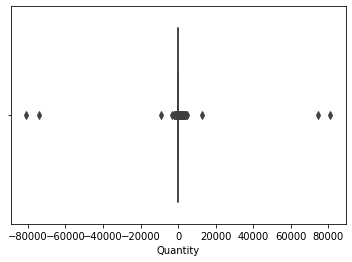

In [199]:
sns.boxplot(df.Quantity)




##**Explore Basket/Orders**

**a) What's the average number of orders per customer?**

In [200]:
# get unique InvoiceNo number per customer
groupby_customers = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [201]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


The average number of orders per customer is 5.

As we found in descriptive statistics that customers buy in average (mean) a quantity of 10. Are they from the same product? Let's examine how many products are purchased.

**b) What's the average number of unique items per order?**

In [202]:
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()

,productsNumber
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [203]:
groupby_invoice.describe()

,productsNumber
count,22190.000000
mean,17.876566
std,22.872614
min,1.000000
25%,3.000000
50%,12.000000
75%,24.000000
max,541.000000


In [204]:
df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()


count    22190.000000
mean        17.876566
std         22.872614
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
Name: StockCode, dtype: float64

In [205]:
temp_df =df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [206]:
transaction_df.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


As images speak more, let's see what the distribution of productsNumber tells us.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


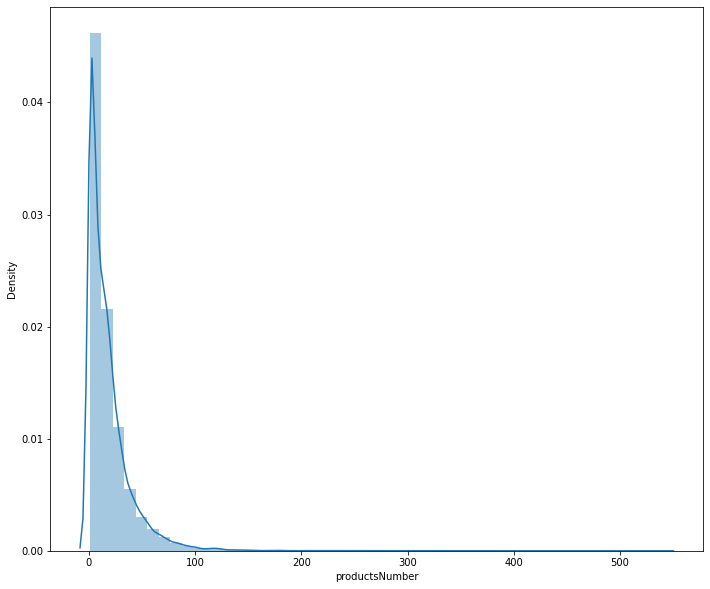

In [207]:
#Visualize the variable productsNumber distribution
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(groupby_invoice['productsNumber'],ax=ax)
plt.show()

We have a skewed distribution of products. Most people buy less than 25 items.

In [208]:
df1=df.dropna(subset=['CustomerID','Description'],how = 'any', inplace = True)
print(f'The shape of the data is {df.shape}')
print("Null Values in each Column:")
df.isna().sum(axis=0).sort_values(ascending=False)

The shape of the data is (406829, 10)
Null Values in each Column:


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
TotalCost      0
dtype: int64

In [209]:
print(f"The number of duplicates in the dataset is {df.duplicated(keep='first').sum(axis = 0)}")
df.drop_duplicates(inplace=True)
print(f"Duplicates Dropped...\nThe number of duplicates in the dataset now is {df.duplicated(keep='first').sum(axis = 0)}")

The number of duplicates in the dataset is 5225
Duplicates Dropped...
The number of duplicates in the dataset now is 0


In the above code all the rows missing the value of CustomerID and the description of the products are identified and dropped.
Also the duplicates are searched among the data and only a single copy is backed.

In [210]:
print('Number of transaction: ',df['InvoiceNo'].nunique())
print('Number of unique products: ',df['StockCode'].nunique())
print('Number of customers: ',df['CustomerID'].nunique())

Number of transaction:  22190
Number of unique products:  3684
Number of customers:  4372


In [289]:
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [290]:
df.nsmallest(n=10, columns=['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost,year,Year,Month,mon,month
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,2010-12-05,0.0,2010,2010,December,12,December
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,2010-12-16,0.0,2010,2010,December,12,December
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,2010-12-21,0.0,2010,2010,December,12,December
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,2011-01-06,0.0,2011,2011,January,1,January
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,2011-01-06,0.0,2011,2011,January,1,January
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,2011-01-13,0.0,2011,2011,January,1,January
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,2011-02-10,0.0,2011,2011,February,2,February
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,2011-03-23,0.0,2011,2011,March,3,March
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,2011-03-30,0.0,2011,2011,March,3,March
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,2011-04-04,0.0,2011,2011,April,4,April


In [291]:
df.nlargest(n=10, columns=['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost,year,Year,Month,mon,month
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,2011-06-10,-38970.00,2011,2011,June,6,June
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom,2011-05-03,-8142.75,2011,2011,May,5,May
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,2011-05-03,8142.75,2011,2011,May,5,May
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom,2011-05-03,-6930.00,2011,2011,May,5,May
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom,2011-07-18,-4287.63,2011,2011,July,7,July
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France,2011-10-27,4161.06,2011,2011,October,10,October
422375,C573079,M,Manual,-2,2011-10-27 14:15:00,4161.06,12536.0,France,2011-10-27,-8322.12,2011,2011,October,10,October
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France,2011-10-27,4161.06,2011,2011,October,10,October
406404,C571750,M,Manual,-1,2011-10-19 11:16:00,3949.32,12744.0,Singapore,2011-10-19,-3949.32,2011,2011,October,10,October
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore,2011-10-19,3949.32,2011,2011,October,10,October
